In [50]:
from unidecode import unidecode
import mysql.connector as connection
import pandas as pd
import numpy as np
from openpyxl import load_workbook

pd.set_option('max_columns',500)

# Creacion de Directorios

In [24]:
os.chdir("c:\\Users\\Edwin.Mejia\\Documents\\Danilo Mejia\\Proyectos\\Evok")
espacio_trabajo="20210727-Tablero-Evok"

datosPath=os.getcwd()+"\\Datos\\"+espacio_trabajo+"\\"
diccionarioPath=os.getcwd()+"\\Diccionarios\\"+espacio_trabajo+"\\"
documentosPath=os.getcwd()+"\\Documentos\\"+espacio_trabajo+"\\"
resultadosPath=os.getcwd()+"\\Resultados\\"+espacio_trabajo+"\\"
scriptsPath=os.getcwd()+"\\Scripts\\"+espacio_trabajo+"\\"

# Carga de datos

In [25]:
detalle_df = pd.read_excel(datosPath+'Ventas Detalle.xlsx')
columns = [unidecode(x).lower().replace(' ','_').replace('.','') for x in detalle_df.columns]
detalle_df.columns = columns
detalle_df.head()

,fecha,store,tienda,factura,des_item,cantidad,valor_bruto,descuento,impuesto,valor_neto,fecha_creacion,origen
0,2020-05-01,650,EVOK TESORO,V650-00000287-650,MIEL DE ABEJAS B MONTES DE MARIA 280G,1,19000,0,0,19000,2020-05-01 07:32:35.880,ON LINE
1,2020-05-01,650,EVOK TESORO,V650-00000296-650,MIEL DE ABEJAS B MONTES DE MARIA 280G,1,19000,0,0,19000,2020-05-01 07:59:46.170,ON LINE
2,2020-05-01,650,EVOK TESORO,V650-00000296-650,"CHOC BBON V 70% MORA, POMARROSA 10UNX5G",1,13025,0,2475,15500,2020-05-01 07:59:46.170,ON LINE
3,2020-05-01,650,EVOK TESORO,V650-00000298-650,"CHOC BBON V 70% MORA, POMARROSA 10UNX5G",1,13025,0,2475,15500,2020-05-01 08:00:43.890,ON LINE
4,2020-05-01,650,EVOK TESORO,V650-00000300-650,MIEL DE ABEJAS B MONTES DE MARIA 280G,1,19000,0,0,19000,2020-05-01 08:01:36.913,ON LINE


In [26]:
factura_df = pd.read_excel(datosPath+'Venta X Factura.xlsx')
columns = [unidecode(x).lower().replace(' ','_')for x in factura_df.columns]
factura_df.columns = columns
factura_df.head()

,fecha,store,tienda,factura,cajero,id_cliente,valor_bruto,descuento_linea,descuento_global,impuesto,valor_neto,fecha_creacion,origen
0,2020-05-01,650,EVOK TESORO,V650-00000291-650,NaN,1075249981,41933,0,0,7967,49900,2020-05-01 07:57:14.540,ON LINE
1,2020-05-01,650,EVOK TESORO,V650-00000292-650,NaN,1094915480,41933,0,0,7967,49900,2020-05-01 07:57:45.487,ON LINE
2,2020-05-01,650,EVOK TESORO,V650-00000293-650,NaN,10171671623,24370,0,0,4630,29000,2020-05-01 07:58:21.653,ON LINE
3,2020-05-01,650,EVOK TESORO,V650-00000294-650,NaN,15445648,40336,0,0,7664,48000,2020-05-01 07:58:50.080,ON LINE
4,2020-05-01,650,EVOK TESORO,V650-00000295-650,NaN,43631134,88235,0,0,16765,105000,2020-05-01 07:59:18.880,ON LINE


In [27]:
clientesPOS_df = pd.read_excel(datosPath+'Clientes POS.xlsx')
columns = [unidecode(x).lower().replace(' ','_')for x in clientesPOS_df.columns]
clientesPOS_df.columns = columns
clientesPOS_df.head()

,nit,dv,tipo_identificacion,razon_social,apellido_1,apellido_2,nombres,fecha_nacimiento,direccion,pais,departamento,ciudad,barrio,telefono,fax,codigo_postal,email,genero,celular,habeas,fecha_habeas
0,*,NaN,C,HERRERA EDUARDO,HERRERA,NaN,EDUARDO,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,* 901251017-1,NaN,C,PRODUCTOS CAPILARES LZ SAS,PRODUCTOS CAPILARES LZ SAS,NaN,NaN,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,***,0.0,N,40332674,40332674,NaN,NaN,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,**900297269-3,NaN,C,grupo auto motriz automundo,grupo auto motriz automundo,NaN,NaN,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,*1018411651,NaN,C,arango victor,arango,NaN,victor,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [28]:
clientesERP_df = pd.read_excel(datosPath+'Clientes ERP.xlsx')
columns = [unidecode(x).lower().replace(' ','_')for x in clientesERP_df.columns]
clientesERP_df.columns = columns
clientesERP_df.head()

,nit,razon_social,1re_apellido,2do_apellido,nombre,direccion,id_pais,id_departamento,id_ciudad,telefono,email,celular
0,2019422,COMNINOS MENG CLEA,COMNINOS,MENG,CLEA,CRA 40 # 44 - 06 EDIFICIO DUBAI APTO 3,169.0,68.0,1.0,3127383331,CLEACOM@GMAIL.COM,NaN
1,5244643,LEE LEE DONGWON,LEE,LEE,DONGWON,URBANIZACION CAMINO DEL ESTE APARTMENT,169.0,5.0,1.0,3165540804,CMCOL5152@GMAIL.COM,NaN
2,1000048425,JIMENEZ GALLEGO ANTONIA,JIMENEZ,GALLEGO,ANTONIA,CARRERA 9 BIS #97-33,169.0,25.0,1.0,541163707864,ANTO24JG@GMAIL.COM,NaN
3,1000145907,GARAVITO ALARCON ANGIE,GARAVITO,ALARCON,ANGIE,HACIENDA FONTANAR CEREZO,169.0,25.0,175.0,3212018125,ANGIEGA1234@GMAIL.COM,NaN
4,1000185882,ESPINEL ORTEGA CATHALINA,ESPINEL,ORTEGA,CATHALINA,CARRERA 103 #12B-106 CASA M3,169.0,76.0,1.0,3138157417,ESPINELC787@GMAIL.COM,NaN


# Consolidación Tablero

## Indicadores por periodos

In [29]:
periodos_frecuencias_dict = {
    'mes':'mensual',
    'trimestre':'trimestral',
    'semestre':'semestral',
    'agno':'anual'
}

def obtener_variables_tiempo(df,columna_fecha):
    """
    Adicona variables de tiempo a un dataframe
    
    Parametros
    df = data frame
    columna_fecha = columna del dataframe que indica la fecha. 
    
    Salida
    dataframe con las variables nuevas de tiempo
    """
    
    df[columna_fecha] = pd.to_datetime(df[columna_fecha],yearfirst=True)
    df['fecha'] = df[columna_fecha].dt.date
    df['agno'] = df[columna_fecha].dt.year
    df['mes'] = df[columna_fecha].dt.to_period('M').astype(str)
    df['trimestre'] = df[columna_fecha].dt.to_period('Q').astype(str)
    df['semestre'] = df[columna_fecha].dt.year.astype(str) + 'S'+ np.where(df[columna_fecha].dt.quarter.gt(2),2,1).astype(str)
    df['mes_nombre'] = df[columna_fecha].dt.strftime("%B")
    df['dia_sem'] = df[columna_fecha].dt.dayofweek
    df['dia_sem_nombre'] = df[columna_fecha].dt.strftime("%A")
    df['hora'] = df[columna_fecha].dt.hour
    
    return df


def obtener_recurrentes(df,columna_idcliente,columna_fecha):
    """
    Adicona la variable recurrente que indica si un cliente es un comprador recurrente
    
    Parametros
    df = data frame
    columna_idcliente = columna del dataframe que indica el identificador del cliente. 
    columna_fecha = columna del dataframe que indica la fecha. 
    
    Salida
    dataframe con la variable 'reccurente' adicionada
    """    
    
    df = df.sort_values(by=columna_fecha)
    df['recurrente'] = df.duplicated(subset=[columna_idcliente]).astype(int)
    df['recurrente'] = np.where(df.id_cliente.isna(),0,df['recurrente'])
    
    return df

def obtener_ventas_clientes_x_periodo(df,columna_periodo,columna_idcliente):
    """
    Obtiene las ventas, clientes, clientes nuevos y clientes recurrentes por
    periodo
    
    Parametros
    df = data frame
    columna_periodo = columna del dataframe que indica el periodo de agrupación. 
    columna_idcliente = columna del dataframe que indica el identificador del cliente. 
    
    Salida
    dataframe con la variable 'reccurente' adicionada
    """ 

    # ventas por periodo
    ventas = df.groupby(by=[columna_periodo]).agg({'valor_neto':'sum'})

    #Clientes unicos por periodo
    clientes = df.groupby(by=[columna_periodo]).agg({columna_idcliente:'nunique'})

    #Clientes recurrentes por periodo (que ya habia comprado en un periodo anterior)
    recurrentes = df.groupby(by=[columna_periodo,columna_idcliente]).agg({'recurrente':'min'}).reset_index()
    recurrentes = recurrentes.groupby(by=[columna_periodo]).agg({'recurrente':'sum'})

    #dataframe consolidado con los indicadores por periodo
    final = pd.concat([ventas,clientes,recurrentes],axis=1).reset_index()
    final.columns = ['periodo','ventas','clientes','recurrentes']

    # clientes nuevos en cada periodo
    final['nuevos'] = final['clientes'] - final['recurrentes']

    #Frecuencia del periodo
    final['frecuencia'] = periodos_frecuencias_dict[columna_periodo]

    return final

In [30]:
factura_df = obtener_variables_tiempo(df=factura_df,columna_fecha='fecha_creacion')
detalle_df = obtener_variables_tiempo(df=detalle_df,columna_fecha='fecha_creacion')

In [31]:
# Validar si es ciero que todos las facturas de origenb POS son de tiendas, las de ERP son institucional
factura_pos_df = factura_df[factura_df.origen=='POS'].reset_index(drop=True)
factura_online_df = factura_df[factura_df.origen=='ON LINE'].reset_index(drop=True)
factura_erp_df = factura_df[factura_df.origen=='ERP'].reset_index(drop=True)

factura_pos_df = obtener_recurrentes(factura_pos_df,'id_cliente','fecha_creacion')
factura_online_df = obtener_recurrentes(factura_online_df,'id_cliente','fecha_creacion')
factura_erp_df = obtener_recurrentes(factura_erp_df,'id_cliente','fecha_creacion')

df_canal_dict = {
    'online':factura_online_df,
    'tiendas':factura_pos_df,
    'institucional':factura_erp_df
}

dfs_periodos_list = []
for canal in df_canal_dict:
    for periodo in periodos_frecuencias_dict:
        au_df = obtener_ventas_clientes_x_periodo(df_canal_dict[canal],periodo,'id_cliente')
        au_df['canal'] = canal
        dfs_periodos_list.append(au_df)

In [32]:
indicadores_x_periodocanal_df = pd.concat(dfs_periodos_list)
indicadores_x_periodocanal_df

,periodo,ventas,clientes,recurrentes,nuevos,frecuencia,canal
0,2020-01,1072997,12,0,12,mensual,online
1,2020-02,1703377,14,0,14,mensual,online
2,2020-03,2105918,26,0,26,mensual,online
3,2020-04,8736155,138,4,134,mensual,online
4,2020-05,26790626,334,28,306,mensual,online
...,...,...,...,...,...,...,...
0,2020S1,251178961,36,0,36,semestral,institucional
1,2020S2,594859204,67,19,48,semestral,institucional
2,2021S1,93096621,37,22,15,semestral,institucional
0,2020,846038165,84,0,84,anual,institucional


In [53]:
#Exportando a Google Sheet (GS)
indicadores_x_periodocanal_df.to_excel(resultadosPath+"output.xlsx",sheet_name='indicadores_x_periodocanal_df',index=False)  

## Clientes según número de compras

In [38]:
def asig_cat_compras(x):
    if x==1:
        return '1 compra'
    elif x==2:
        return '2 compras'
    elif x==3:
        return '3 compras'
    else:
        return '4 ó más compras'

def obtener_InfoTransa(df,columna_fecha,columna_idcliente):
    """
    df: debe estar a nivel de factura y no a nivel de detalle
    """
    primer_compra_df = df.sort_values(by=columna_fecha).drop_duplicates(subset=[columna_idcliente])[[columna_idcliente,columna_fecha]].set_index(keys=columna_idcliente)
    primer_compra_df.columns = ['fecha_primer_compra']

    ultima_compra_df = df.sort_values(by=columna_fecha,ascending=False).drop_duplicates(subset=[columna_idcliente])[[columna_idcliente,columna_fecha]].set_index(keys=columna_idcliente)
    ultima_compra_df.columns = ['fecha_ultima_compra']

    nro_compras_df = pd.DataFrame(df.groupby(by=[columna_idcliente]).size()).rename(columns={0:'nro_compras'})

    usuarios_req = set(nro_compras_df[nro_compras_df['nro_compras']>1].index)
    frecuencia_df = df[df[columna_idcliente].isin(usuarios_req)]
    frecuencia_df = frecuencia_df.groupby(by=[columna_idcliente,columna_fecha]).size().reset_index()
    frecuencia_df = frecuencia_df.sort_values(by=[columna_idcliente,columna_fecha])
    frecuencia_df['fecha_prev'] = frecuencia_df.groupby(by=columna_idcliente)[columna_fecha].shift()
    frecuencia_df['frecuencia_dias'] = ((frecuencia_df[columna_fecha] - frecuencia_df['fecha_prev'])).apply(lambda x: x.days if x is not None else x)
    frecuencia_df = frecuencia_df.groupby(by=[columna_idcliente]).agg({'frecuencia_dias':'mean'}).reset_index()
    frecuencia_df['frecuencia_dias'] = frecuencia_df['frecuencia_dias'].fillna(0)
    frecuencia_df = frecuencia_df.set_index(keys=columna_idcliente)

    TP_df = df.groupby(by='id_cliente').agg({'valor_neto':['mean','sum']})
    TP_df.columns = ['TP','ventas']

    cons_df = pd.concat([primer_compra_df,ultima_compra_df,nro_compras_df,frecuencia_df,TP_df],axis=1)
    cons_df['recencia'] = (df[columna_fecha].max()-cons_df['fecha_ultima_compra']).dt.days
    cons_df['cat_compras'] = cons_df['nro_compras'].map(asig_cat_compras)

    return cons_df

In [39]:
agnos = [2020,2021,'acumulado']

df_canal_dict = {
    'online':factura_online_df,
    'tiendas':factura_pos_df,
    'institucional':factura_erp_df
}


dfs_cat_clientes = []
for canal in df_canal_dict:
    for agno in agnos:
        if agno == 'acumulado':
            df = df_canal_dict[canal]
        else:
            df = df_canal_dict[canal][df_canal_dict[canal]['agno']==agno]
        info_df = obtener_InfoTransa(df,'fecha','id_cliente').reset_index()
        info_df_grouped = info_df.groupby(by=['cat_compras']).agg({
                                                                'id_cliente':'nunique',
                                                                'ventas':'sum',
                                                                'TP':'mean',
                                                                'frecuencia_dias':'mean'}).reset_index()
        info_df_grouped.rename(columns={'id_cliente':'clientes'},inplace=True)
        info_df_grouped['canal'] = canal
        info_df_grouped['periodo'] = agno
        dfs_cat_clientes.append(info_df_grouped)

In [40]:
info_catcliente_df = pd.concat(dfs_cat_clientes)
info_catcliente_df

,cat_compras,clientes,ventas,TP,frecuencia_dias,canal,periodo
0,1 compra,1832,1.556260e+08,8.494870e+04,NaN,online,2020
1,2 compras,313,5.559567e+07,8.881097e+04,50.913738,online,2020
2,3 compras,87,2.027330e+07,7.767549e+04,44.833333,online,2020
3,4 ó más compras,89,3.604560e+07,7.410081e+04,37.431273,online,2020
0,1 compra,786,6.574598e+07,8.364628e+04,NaN,online,2021
1,2 compras,89,1.413832e+07,7.942876e+04,37.359551,online,2021
2,3 compras,22,5.290527e+06,8.015950e+04,37.863636,online,2021
3,4 ó más compras,16,5.660883e+06,7.789551e+04,29.060417,online,2021
0,1 compra,2400,2.043410e+08,8.514210e+04,NaN,online,acumulado
1,2 compras,411,7.039873e+07,8.564323e+04,80.603406,online,acumulado


In [54]:
#Exportando a Google Sheet (GS)
path=resultadosPath+"output.xlsx"

book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

info_catcliente_df.to_excel(writer, sheet_name = 'info_catcliente_df', index=False)
writer.save()
writer.close()

## Segmentación RFM

In [55]:
orden_segmento_dict = {
    'oro':1,
    'plata':2,
    'bronce':3
}

segmentos_dict = {
    '333':'oro',
    '332':'oro',
    '331':'oro',
    '323':'oro',
    '322':'oro',
    '321':'oro',
    '313':'oro',
    '312':'plata',
    '311':'plata',
    '233':'oro',
    '232':'plata',
    '231':'plata',
    '223':'plata',
    '222':'plata', 
    '221':'bronce',
    '213':'plata',
    '212':'bronce',
    '211':'bronce',
    '133':'plata',
    '132':'plata',
    '131':'bronce', 
    '123':'plata',
    '122':'bronce',
    '121':'bronce',
    '113':'bronce',
    '112':'bronce',
    '111':'bronce',
}

In [56]:
delta = 90
df = factura_online_df

max_fecha = df.fecha.max()
df['recencia'] = (max_fecha - factura_df.fecha).dt.days
filtrado_df = df[df.recencia<=delta]
RFM_df = filtrado_df.groupby(by=['id_cliente']).agg({'recencia':'min','factura':'count','valor_neto':'sum'})
RFM_df.columns = ['recencia','frecuencia','monto']
RFM_df.head()

,recencia,frecuencia,monto
id_cliente,,,
353237,37,1,141999
370727,34,1,89000
942964,11,1,88749
1021215,9,1,92999
1131513,83,1,83500


In [57]:
quantiles = [0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.97,0.98,0.99]
for q in quantiles:
    print('q: {}, Frecuencia cuantil: {}'.format(q, RFM_df['frecuencia'].quantile(q=q)))

q: 0.8, Frecuencia cuantil: 1.0
q: 0.9, Frecuencia cuantil: 2.0
q: 0.91, Frecuencia cuantil: 2.0
q: 0.92, Frecuencia cuantil: 2.0
q: 0.93, Frecuencia cuantil: 2.0
q: 0.94, Frecuencia cuantil: 2.0
q: 0.95, Frecuencia cuantil: 2.0
q: 0.97, Frecuencia cuantil: 2.0
q: 0.98, Frecuencia cuantil: 3.0
q: 0.99, Frecuencia cuantil: 3.0


In [58]:
RFM_df.frecuencia.unique()

array([1, 2, 4, 3], dtype=int64)

In [59]:
max_fecha = df.fecha.max()
df['recencia'] = (max_fecha - factura_df.fecha).dt.days
filtrado_df = df[df.recencia<=delta]
RFM_df = filtrado_df.groupby(by=['id_cliente']).agg({'recencia':'min','factura':'count','valor_neto':'sum'})
RFM_df.columns = ['recencia','frecuencia','monto']

RFM_df['R_pts'] = pd.qcut(RFM_df['recencia'], q = 3, labels = [3, 2, 1])
RFM_df['F_pts'] = np.where(RFM_df['frecuencia']>2,3,RFM_df['frecuencia']) #Esta condicion se debe evaluar constantemente
RFM_df['M_pts'] = pd.qcut(RFM_df['monto'], q = 3, labels = [1, 2, 3])
RFM_df['RFM'] = RFM_df['R_pts'].astype(str) + RFM_df['F_pts'].astype(str) + RFM_df['M_pts'].astype(str)
RFM_df.head()


,recencia,frecuencia,monto,R_pts,F_pts,M_pts,RFM
id_cliente,,,,,,,
353237,37,1,141999,2,1,3,213
370727,34,1,89000,2,1,2,212
942964,11,1,88749,3,1,2,312
1021215,9,1,92999,3,1,2,312
1131513,83,1,83500,1,1,2,112


In [60]:
RFM_df['segmento'] = RFM_df['RFM'].map(segmentos_dict)
RFM_df = RFM_df.reset_index()
RFM_df.head()

,id_cliente,recencia,frecuencia,monto,R_pts,F_pts,M_pts,RFM,segmento
0,353237,37,1,141999,2,1,3,213,plata
1,370727,34,1,89000,2,1,2,212,bronce
2,942964,11,1,88749,3,1,2,312,plata
3,1021215,9,1,92999,3,1,2,312,plata
4,1131513,83,1,83500,1,1,2,112,bronce


In [61]:
results_RFM_df = RFM_df.groupby(by=['segmento']).agg({'id_cliente':'count',
                                                      'recencia':'mean',
                                                      'frecuencia':'mean',
                                                      'monto':['mean','sum']})

results_RFM_df.columns = ['nro_clientes', 'recencia_prom','frecuencia_prom','monto_prom','ventas']
results_RFM_df['pct_cientes'] = (results_RFM_df['nro_clientes']*100/results_RFM_df['nro_clientes'].sum()).round(0)
results_RFM_df['pct_ventas'] = (results_RFM_df['ventas']*100/results_RFM_df['ventas'].sum()).round(0)

results_RFM_df['TP'] = filtrado_df.merge(right=RFM_df[['id_cliente','segmento']],how='left',on='id_cliente').\
                                groupby(by=['segmento'])['valor_neto'].mean()

results_RFM_df = results_RFM_df.reset_index()
results_RFM_df

,segmento,nro_clientes,recencia_prom,frecuencia_prom,monto_prom,ventas,pct_cientes,pct_ventas,TP
0,bronce,321,57.504673,1.009346,69858.015576,22424423,53.0,39.0,69211.182099
1,oro,80,15.525000,1.700000,170756.712500,13660537,13.0,24.0,100445.125000
2,plata,207,27.985507,1.135266,100771.599034,20859721,34.0,37.0,88764.770213


In [62]:
def obtener_RFMDataFrame(df,delta,columna_fecha,columna_idcliente,columna_idfactura,columna_ventas):
    max_fecha = df[columna_fecha].max()
    df['recencia'] = (max_fecha - factura_df[columna_fecha]).dt.days
    filtrado_df = df[df.recencia<=delta]
    RFM_df = filtrado_df.groupby(by=[columna_idcliente]).agg({'recencia':'min',columna_idfactura:'count',columna_ventas:'sum'})
    RFM_df.columns = ['recencia','frecuencia','monto']

    RFM_df['R_pts'] = pd.qcut(RFM_df['recencia'], q = 3, labels = [3, 2, 1])
    RFM_df['F_pts'] = np.where(RFM_df['frecuencia']>2,3,RFM_df['frecuencia']) #Esta condicion se debe evaluar constantemente
    RFM_df['M_pts'] = pd.qcut(RFM_df['monto'], q = 3, labels = [1, 2, 3])
    RFM_df['RFM'] = RFM_df['R_pts'].astype(str) + RFM_df['F_pts'].astype(str) + RFM_df['M_pts'].astype(str)

    RFM_df['segmento'] = RFM_df['RFM'].map(segmentos_dict)
    RFM_df = RFM_df.reset_index()
    
    results_RFM_df = RFM_df.groupby(by=['segmento']).agg({columna_idcliente:'count',
                                                          'recencia':'mean',
                                                          'frecuencia':'mean',
                                                          'monto':['mean','sum']})

    results_RFM_df.columns = ['nro_clientes', 'recencia_prom','frecuencia_prom','monto_prom','ventas']
    results_RFM_df['pct_cientes'] = (results_RFM_df['nro_clientes']*100/results_RFM_df['nro_clientes'].sum()).round(0)
    results_RFM_df['pct_ventas'] = (results_RFM_df['ventas']*100/results_RFM_df['ventas'].sum()).round(0)

    results_RFM_df['TP'] = filtrado_df.merge(right=RFM_df[[columna_idcliente,'segmento']],how='left',on=columna_idcliente).\
                                    groupby(by=['segmento'])['valor_neto'].mean()
    
    results_RFM_df = results_RFM_df.reset_index()
    results_RFM_df['orden_segmetno'] = results_RFM_df['segmento'].map(orden_segmento_dict)

    return RFM_df, results_RFM_df 

In [63]:
delta = 90
columna_fecha = 'fecha'
columna_idcliente = 'id_cliente'
columna_idfactura = 'factura'
columna_ventas = 'valor_neto'

df_canal_dict = {
    'online':factura_online_df,
    'tiendas':factura_pos_df
}

RFM_dfs_list = []
results_RFM_dfs_list = []
dict_total_clientes = {}
for canal in df_canal_dict:
    df = df_canal_dict[canal]
    RFM_df, results_RFM_df = obtener_RFMDataFrame(df,delta,columna_fecha,columna_idcliente,columna_idfactura,columna_ventas)
    RFM_df['canal'] = canal
    results_RFM_df['canal'] = canal
    RFM_dfs_list.append(RFM_df)
    results_RFM_dfs_list.append(results_RFM_df)
    dict_total_clientes[canal] = df[columna_idcliente].nunique()
    

In [64]:
RFM_df = pd.concat(RFM_dfs_list)
results_RFM_df = pd.concat(results_RFM_dfs_list)

In [65]:
RFM_df.head()

,id_cliente,recencia,frecuencia,monto,R_pts,F_pts,M_pts,RFM,segmento,canal
0,353237,37,1,141999,2,1,3,213,plata,online
1,370727,34,1,89000,2,1,2,212,bronce,online
2,942964,11,1,88749,3,1,2,312,plata,online
3,1021215,9,1,92999,3,1,2,312,plata,online
4,1131513,83,1,83500,1,1,2,112,bronce,online


In [69]:
results_RFM_df.head()

,segmento,nro_clientes,recencia_prom,frecuencia_prom,monto_prom,ventas,pct_cientes,pct_ventas,TP,orden_segmetno,canal
0,bronce,321,57.504673,1.009346,69858.015576,22424423,53.0,39.0,69211.182099,3,online
1,oro,80,15.525000,1.700000,170756.712500,13660537,13.0,24.0,100445.125000,1,online
2,plata,207,27.985507,1.135266,100771.599034,20859721,34.0,37.0,88764.770213,2,online
0,bronce,6773,57.352724,1.013731,52061.566071,352612987,53.0,37.0,51356.391931,3,tiendas
1,oro,1829,14.001640,2.155823,167419.014762,306209378,14.0,32.0,77658.985037,1,tiendas


In [70]:
dict_total_clientes

{'online': 3056, 'tiendas': 55391}

In [71]:
total_clientes_df = pd.DataFrame.from_dict(dict_total_clientes,orient='index')
total_clientes_df['activos'] = results_RFM_df.groupby(by='canal')['nro_clientes'].sum()
total_clientes_df = total_clientes_df.reset_index()
total_clientes_df.columns = ['canal','clientes','activos']
total_clientes_df['inactivos'] = total_clientes_df['clientes'] - total_clientes_df['activos']
total_clientes_df

,canal,clientes,activos,inactivos
0,online,3056,608,2448
1,tiendas,55391,12875,42516


In [72]:
#Exportando a Google Sheet (GS)
path=resultadosPath+"output.xlsx"

book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

results_RFM_df.to_excel(writer, sheet_name = 'results_RFM_df', index=False)
writer.save()
writer.close()

In [73]:
#Exportando a Google Sheet (GS)
path=resultadosPath+"output.xlsx"

book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

total_clientes_df.to_excel(writer, sheet_name = 'total_clientes_df', index=False)
writer.save()
writer.close()

**Observacion** 

+ Se debe analizar desde el negocio a que clientes se consideran como inactivos. En este caso estamos considerando como inactivo a todo cliente que lleve más de 90 dias (delta) sin hacer una compra. Sin embargo, muchos de ellos ya deberían ser llamados de otra forma, quizá desertores (e.g los que lleven más de 1 año sin comprar), ya que la probabilidad de reactivarlos es muy baja. 

+ Se debe agregar la información historica de las ventas. Cuadrar con Jimmy para que deje un historico desde el 2017 hasta el 2020 y que la info del 2021 se actualice (el archivo se reemplaza) 

+ Se debe analizar en detalle los pts asignados a la frecuencia en las variables de RFM. El delta de días para considerar a los activos se debe definir desde negocio. Se usó 90 días ya que los días promedio entre cada compra es cerca de 40 días y además con este delta las ventas de los activos coincide con las ventas del último trimestre, esto permitiria fijar metas por trimestre en términos de los activos y su segmentación RFM.

+ Gestionar un documento que permita categorizar los productos según tipo de producto (chocolate, infusiones, ...). Esto permite analizar la composición de las cestas de consumo en término de estas categorias, y de esta manera se hace más facil la interpretación de las categorias mas afines entre si. Si se hace a nivel de producto sería muy engorroso ya que hay más 700 producto distintos. 

+ Con la categorización se puede sacar el top de categorías mas vendidas por canal y tienda, y el top de los productos más vendidos en cada categoría.

+ Adicionar al tablero el top de tiendas con mas ventas (en el caso de canal tiendas) 

+ Adicionar al tablero la opción de ver las ventas y nro de clientes por un rango de fecha escogido

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
def obtener_clusters_optimos(X):

    # Instantiate the clustering model and visualizer
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,12))

    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

    return visualizer.elbow_value_

In [ ]:
RFM_df.head()

,recencia,frecuencia,monto
id_cliente,,,
353237,37,1,141999
370727,34,1,89000
942964,11,1,88749
1021215,9,1,92999
1131513,83,1,83500


In [ ]:
X = RFM_df.values

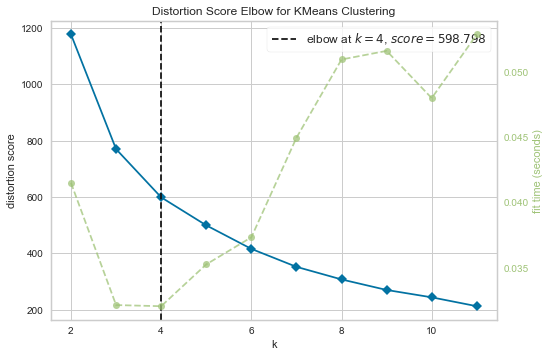

4

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = scaler.transform(X)

obtener_clusters_optimos(X=X_scaled)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dic_features_order = {'recencia':0,'frecuencia':1,'monto':2}
dic_names_features = {0:'recencia',1:'frecuencia',2:'monto'}

In [ ]:
model = KMeans(n_clusters=3)
model.fit(X_scaled)

centroids = model.cluster_centers_
labels = model.predict(X_scaled)

reverse_features = scaler.inverse_transform(X_scaled)
reverse_centroides = scaler.inverse_transform(centroids)

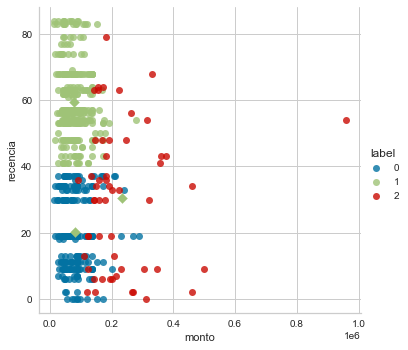

In [ ]:
RFM_df['label'] = labels

col_x = 'monto'
col_y = 'recencia'

x, y = dic_features_order[col_x],dic_features_order[col_y]

centroids_x_reverse = reverse_centroides[:,x]
centroids_y_reverse = reverse_centroides[:,y]

#plt.figure(figsize=(17,7))
sns.lmplot(data=RFM_df, x=col_x, y=col_y, hue='label', fit_reg=False, legend=True, legend_out=True)
plt.scatter(centroids_x_reverse,centroids_y_reverse,marker='D', s=50)
plt.xlabel(xlabel=dic_names_features[x])
plt.ylabel(ylabel=dic_names_features[y])
plt.show()